# Single Perceptron

## import libraries

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from pprint import pprint

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

TensorFlow 2.x selected.


## Defining Layer

In [0]:
from tensorflow.keras import layers


class Perceptron(layers.Layer):

  def perceptron(self,input_data):
    res = tf.matmul(input_data, self.weight)
    bias_res = tf.add(self.bias,res)
    return bias_res

  def __init__(self,input_shape=1):
    super(Perceptron, self).__init__()
    w_init = tf.random_normal_initializer()
    self.weight = self.add_weight(shape=(1,input_shape),
                             initializer='random_normal',name='weight',
                             trainable=True)
    self.bias = self.add_weight(shape=(1,input_shape),
                             initializer='random_normal',name='bias',
                             trainable=True)
    
  def call(self, inputs):   
      return self.perceptron(inputs)
  

## Defining Model

In [0]:
class SinglPerceptorn(tf.keras.Model):

    def __init__(self):
        super(SinglPerceptorn, self).__init__()
        self.perceptron = Perceptron(1)

    def call(self, inputs):
        x = self.perceptron(inputs)
        return x


## Problem 1
converting celcius to farenheit

main eqation is **t(f) = t(c) * 9.5 + 32**


### import data

In [0]:
temp_df = pd.read_csv('/content/011 Celsius-to-Fahrenheit.csv')

### visualization

In [6]:
temp_df.head(5)

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [7]:
temp_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


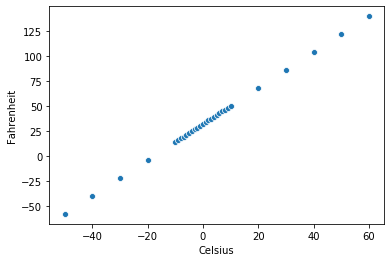

In [8]:
sns.scatterplot(temp_df['Celsius'],temp_df['Fahrenheit'])

In [9]:
x_train, y_train = np.array(temp_df['Celsius'],dtype=np.float32),np.array(temp_df['Fahrenheit'],dtype=np.float32)
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
x_train.shape

(30, 1)

### Training

In [20]:


perceptron = SinglPerceptorn()
history = []

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
# Instantiate a loss function.
loss_fn = tf.keras.losses.MSE
mae =   tf.keras.metrics.MAE

# Prepare the training dataset.
batch_size = 20
seen = True
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=100).batch(batch_size)
training_mae = 100
epoch = 0
while training_mae > 0.0001:
  epoch += 1
  if epoch  % 1000 == 0:
    print('Start of epoch %d' % (epoch,))
  # Iterate over the batches of the dataset.
  for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
    with tf.GradientTape() as tape:
      y_pred = perceptron(x_batch_train)
      loss_value = loss_fn(y_batch_train, y_pred)
      mae_res = mae(y_batch_train, y_pred)

    grads = tape.gradient(loss_value, perceptron.trainable_weights)
    optimizer.apply_gradients(zip(grads, perceptron.trainable_weights))
    training_mse = np.mean(loss_value.numpy())
    training_mae = np.mean(mae_res.numpy())
    history.append([training_mse,training_mae,perceptron.trainable_weights[0].numpy()[0],perceptron.trainable_weights[1].numpy()[0]])
    if epoch  % 1000 == 0:
        print('Training MSE (for one batch) at step %s: %s' % (step,training_mse ))
        print('Training MAE (for one batch) at step %s: %s' % (step,training_mae ))
        print('Seen so far: %s samples' % ((step + 1) *batch_size*epoch))


Start of epoch 1000
Training MSE (for one batch) at step 0: 253.39664
Training MAE (for one batch) at step 0: 15.857513
Seen so far: 20000 samples
Training MSE (for one batch) at step 1: 251.28738
Training MAE (for one batch) at step 1: 15.784108
Seen so far: 40000 samples
Start of epoch 2000
Training MSE (for one batch) at step 0: 21.686434
Training MAE (for one batch) at step 0: 4.6372447
Seen so far: 40000 samples
Training MSE (for one batch) at step 1: 21.94894
Training MAE (for one batch) at step 1: 4.666946
Seen so far: 80000 samples
Start of epoch 3000
Training MSE (for one batch) at step 0: 0.06870252
Training MAE (for one batch) at step 0: 0.26114422
Seen so far: 60000 samples
Training MSE (for one batch) at step 1: 0.0737245
Training MAE (for one batch) at step 1: 0.27033862
Seen so far: 120000 samples
Start of epoch 4000
Training MSE (for one batch) at step 0: 2.104539e-08
Training MAE (for one batch) at step 0: 0.00014472008
Seen so far: 80000 samples
Training MSE (for one 

### Evaluation

In [16]:
temps = [0,10,23,43,345,1000]
# res = perceptron(tf.reshape(tf.Variable(temps,dtype=tf.int64),(len(temps),1))).numpy()
# print(res)
for temp in temps:
  print("real temperature is ",1.8*temp + 32)
  print("predicted temperature is ",perceptron(tf.reshape(tf.Variable(temp,dtype=tf.float32),(1,1))).numpy()[0][0])

real temperature is  32.0
predicted temperature is  31.999018
real temperature is  50.0
predicted temperature is  49.999054
real temperature is  73.4
predicted temperature is  73.3991
real temperature is  109.4
predicted temperature is  109.39917
real temperature is  653.0
predicted temperature is  653.0003
real temperature is  1832.0
predicted temperature is  1832.0027


In [0]:
mae_history = []
mse_history = []
weight_history = []
bias_history = []
for x in history:
  mse_history.append(x[0])
  mae_history.append(x[1])
  weight_history.append(x[2])
  bias_history.append(x[3])

### plotting progress

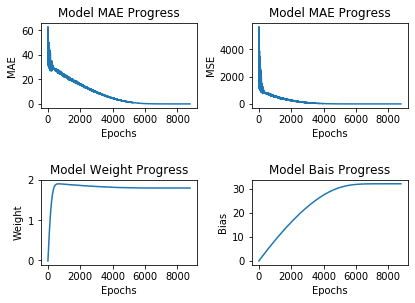

In [23]:
ax1 = plt.subplot(221)
ax1.set_title("Model MAE Progress")
plt.xlabel("Epochs")
plt.ylabel("MAE")
ax1.plot(mae_history)
ax1.grid=True
ax2 =  plt.subplot(222)
ax2.set_title("Model MAE Progress")
plt.xlabel("Epochs")
plt.ylabel("MSE")
ax2.plot(mse_history)
ax2.grid=True
ax3 =  plt.subplot(223)
ax3.set_title("Model Weight Progress")
plt.xlabel("Epochs")
plt.ylabel("Weight")
ax3.plot(weight_history)
ax3.grid=True
ax4 =  plt.subplot(224)
ax4.set_title("Model Bais Progress")
plt.xlabel("Epochs")
plt.ylabel("Bias")
ax4.plot(bias_history)
ax4.grid=True
plt.subplots_adjust(top=1.92, bottom=1.08, left=0.10, right=0.95, hspace=0.85,
                    wspace=0.35)
plt.show()



